<a href="https://colab.research.google.com/github/tranquocdienspkt/AIspkt/blob/main/Cifar10_CNN_14_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import cifar10
from keras.utils import  to_categorical
import matplotlib.pyplot as plt


(x_train, y_train), (x_test, y_test) = cifar10.load_data()



x_train = x_train.reshape(50000,32,32,3)
x_train = x_train.astype('float32')/255

x_test = x_test.reshape(10000,32,32,3)
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train,10)
y_test  = to_categorical(y_test,10)

print(y_train.shape)
print(y_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 10)
(10000, 10)


In [5]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization, LeakyReLU
from keras.optimizers import Adam

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (32,32,3), padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64,(3,3), activation='relu', padding= 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Conv2D(128,(3,3), activation='relu', padding = 'same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D((2,2), padding = 'same'))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_4 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 dropout_5 (Dropout)         (None, 16, 16, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [6]:
from keras.losses import categorical_crossentropy

model.compile(loss = categorical_crossentropy,  optimizer = Adam(), metrics = ['accuracy'])

train = model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1)

Epoch 1/20
782/782 [==============================] - 14s 7ms/step - loss: 1.5410 - accuracy: 0.4355
Epoch 2/20
782/782 [==============================] - 4s 6ms/step - loss: 1.1227 - accuracy: 0.5995
Epoch 3/20
782/782 [==============================] - 5s 6ms/step - loss: 0.9677 - accuracy: 0.6628
Epoch 4/20
782/782 [==============================] - 5s 6ms/step - loss: 0.8724 - accuracy: 0.6924
Epoch 5/20
782/782 [==============================] - 4s 6ms/step - loss: 0.8032 - accuracy: 0.7187
Epoch 6/20
782/782 [==============================] - 5s 6ms/step - loss: 0.7531 - accuracy: 0.7367
Epoch 7/20
782/782 [==============================] - 4s 6ms/step - loss: 0.7089 - accuracy: 0.7493
Epoch 8/20
782/782 [==============================] - 4s 6ms/step - loss: 0.6703 - accuracy: 0.7646
Epoch 9/20
782/782 [==============================] - 5s 6ms/step - loss: 0.6398 - accuracy: 0.7738
Epoch 10/20
782/782 [==============================] - 4s 6ms/step - loss: 0.6084 - accuracy: 0.783

In [7]:
model.save('cifar10_CNN.h5')

In [8]:
from google.colab import files
uploaded = files.upload()

Saving chim.jpg to chim.jpg


TypeError: ignored

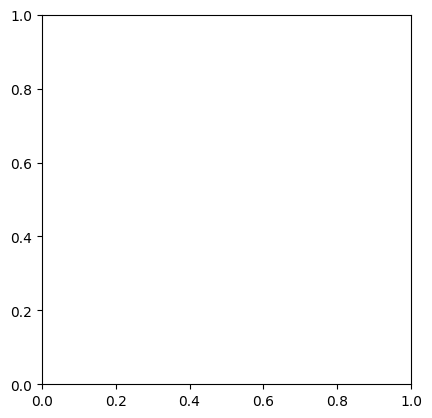

In [13]:
plt.imshow("chim.jpg")